In [13]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
from hyppo.independence import Dcorr
import math

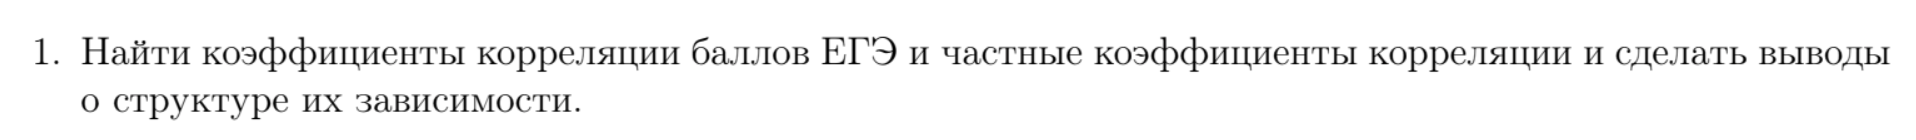

In [12]:
data = pd.read_csv('Dataset-18-Prak.csv', encoding='cp1251',sep=",").dropna()
columns = ['ДВИ', 'МАТ', 'ФИЗ', 'РУС']
print(np.shape(data))
data.columns = columns
data_dvi = data['ДВИ'].to_numpy()
data_math = data['МАТ'].to_numpy()
data_phys = data['ФИЗ'].to_numpy()
data_rus = data['РУС'].to_numpy()

pearsonstat, pvalue1 = sts.pearsonr(data_math, data_rus)
spearmanstat, pvalue2 = sts.spearmanr(data_math, data_rus)
kendallstat, pvalue3 = sts.kendalltau(data_math, data_rus)

print(f"Pearson: coef = {pearsonstat}, pvalue = {pvalue1}")
print(f"Spearman: coef = {spearmanstat}, pvalue = {pvalue2}")
print(f"Kendall: coef = {kendallstat}, pvalue = {pvalue3}\n")
# Вывод: ”Если Х большой, то и Y в среднем тоже”, если мы берём в качестве alpha = 0.05.

def get_partial_corr(method):
    res = pg.pairwise_corr(data, columns = ['МАТ', 'ФИЗ', 'ДВИ', 'РУС'], covar = ['РУС'], method = method)
    print(res, '\n')
    
get_partial_corr('pearson')
get_partial_corr('spearman')


# data.head()

(1449, 4)
Pearson: coef = 0.2261061780557539, pvalue = 2.9714443749306083e-18
Spearman: coef = 0.16985952471898014, pvalue = 7.636557931637485e-11
Kendall: coef = 0.12300592730025424, pvalue = 7.227591879049923e-11

     X    Y   method    covar alternative     n         r         CI95%  \
0  МАТ  ФИЗ  pearson  ['РУС']   two-sided  1449  0.402130  [0.36, 0.44]   
1  МАТ  ДВИ  pearson  ['РУС']   two-sided  1449  0.500366  [0.46, 0.54]   
2  ФИЗ  ДВИ  pearson  ['РУС']   two-sided  1449  0.417799  [0.37, 0.46]   

          p-unc  
0  2.140531e-57  
1  1.373235e-92  
2  2.913855e-62   

     X    Y    method    covar alternative     n         r         CI95%  \
0  МАТ  ФИЗ  spearman  ['РУС']   two-sided  1449  0.381701  [0.34, 0.42]   
1  МАТ  ДВИ  spearman  ['РУС']   two-sided  1449  0.497615  [0.46, 0.54]   
2  ФИЗ  ДВИ  spearman  ['РУС']   two-sided  1449  0.434444  [0.39, 0.48]   

          p-unc  
0  1.969559e-51  
1  1.939915e-91  
2  1.011171e-67   



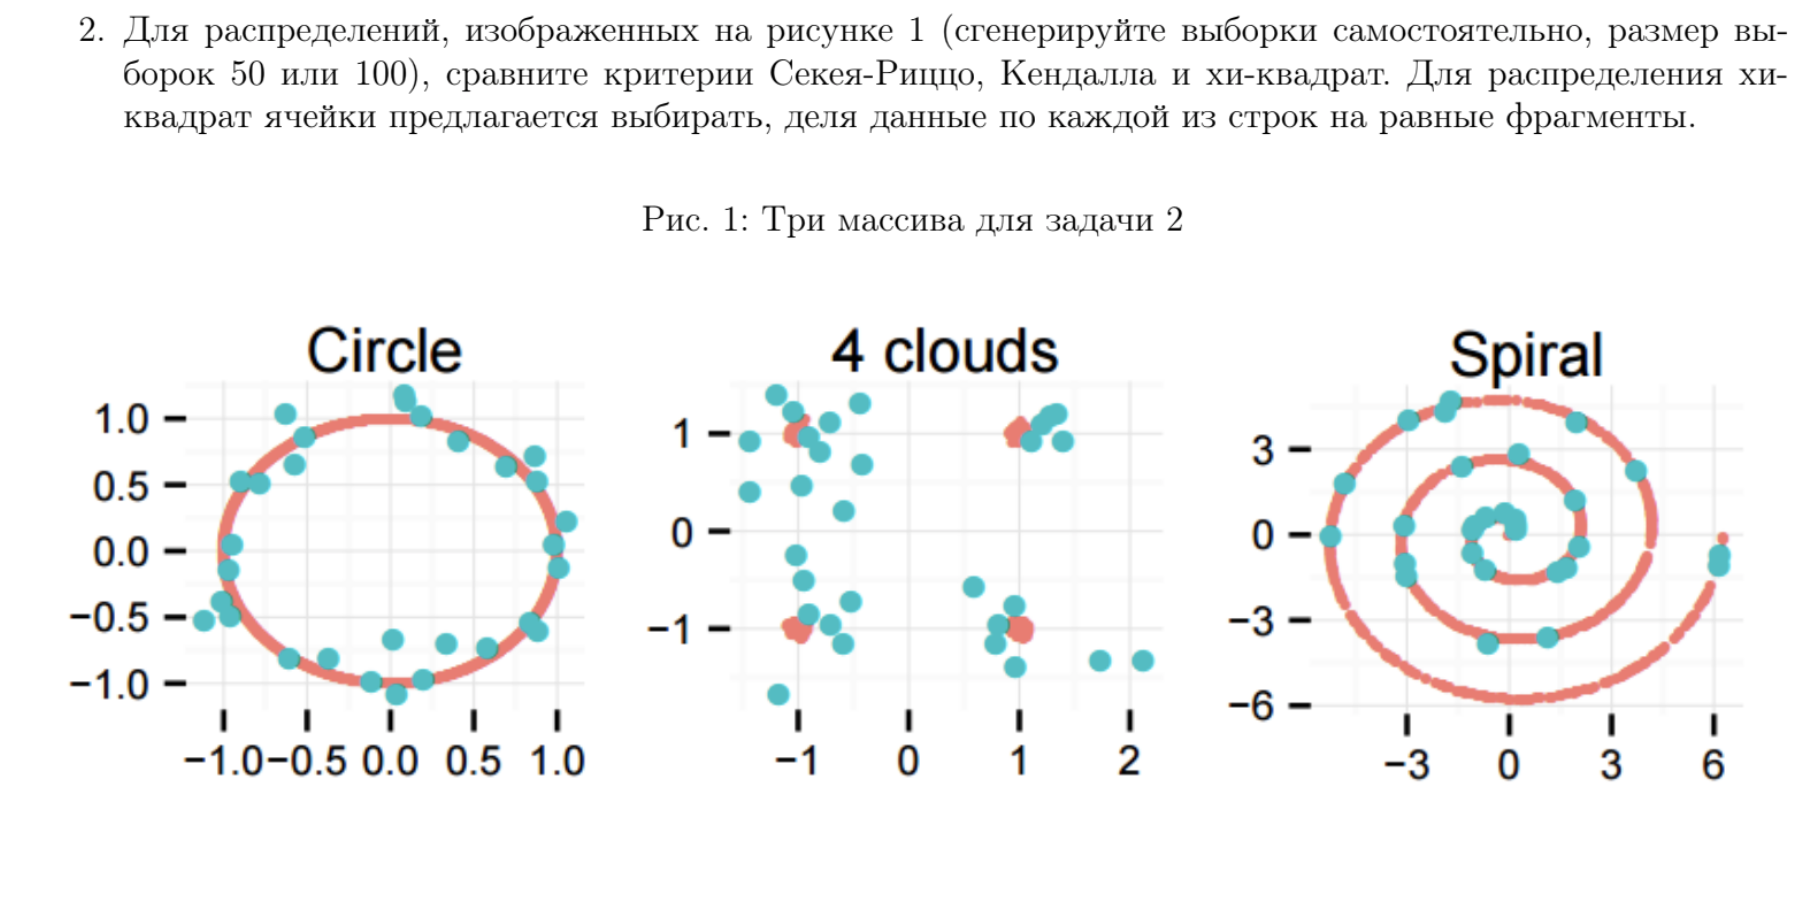


In [11]:
def gen_unicircle(size):
    theta = sts.uniform.rvs(size = size) * 2 * math.pi
    x = np.cos(theta) + sts.norm(scale = 1/50).rvs(size=size)
    y = np.sin(theta) + sts.norm(scale = 1/50).rvs(size=size)
    return x, y
def gen_spiral(size):
    theta = np.sqrt(sts.uniform.rvs(size=size))*6*math.pi
    x = np.cos(theta) * theta / 3
    y = np.sin(theta) * theta / 3
    return x, y
def gen_4clouds(size):
    test_x = np.random.choice((-1,1), size)
    test_y = np.random.choice((-1,1), size)
    scale = 1/2
    x = sts.norm(loc = test_x, scale = scale).rvs()
    y = sts.norm(loc = test_y, scale = scale).rvs()
    return x, y
def get_fobs(x, y):
    z = list(zip(x, y))
    res = []
    ss = len(x)
    df = math.floor(math.log2(ss))
    x_div = np.array_split(np.sort(x), df)
    x_bins = [x_div[i][0] for i in range(df)]
    x_bins.append(x_div[df-1][-1])
    
    y_div = np.array_split(np.sort(y), df)
    y_bins = [y_div[i][0] for i in range(df)]
    y_bins.append(y_div[df-1][-1])
    
    H, xedges, yedges = np.histogram2d(x, y, bins=(x_bins, y_bins))
    return H
def plot(x,y):
    fig, ax = plt.subplots()
    plt.scatter(x,y)
# x, y = gen_unicircle(100)
# x, y = gen_4clouds(100)
# x, y = gen_spiral(100)
# plot(x,y)

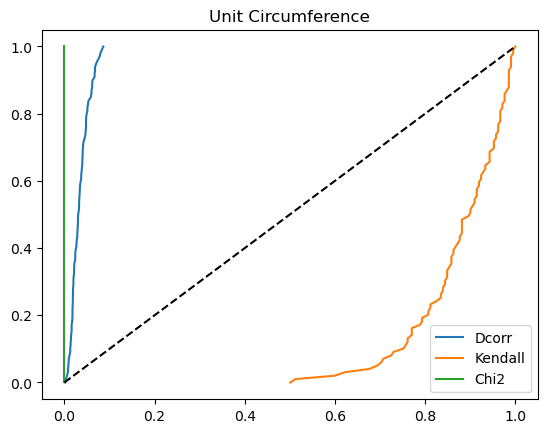

In [37]:
def task(mode, size, name):
    fig, ax = plt.subplots()
    plt.title(f"{name}")
    res1, res2, res3 = [], [], []
    division_rate = 100
    if mode == 1:
        generate_func = gen_unicircle
    elif mode == 2:
        generate_func = gen_4clouds
    elif mode == 3:
        generate_func = gen_spiral
    for j in range(division_rate):
        x, y = generate_func(size)
        res1.append(Dcorr().test(x, y).pvalue)
        res2.append(sts.kendalltau(x,y).pvalue)
        fobs = get_fobs(x,y)
        res3.append(sts.chi2_contingency(fobs).pvalue)
    y = np.linspace(0,1,division_rate)
    ax.plot(np.sort(res1), y, label = "Dcorr")
    ax.plot(np.sort(res2), y, label = "Kendall")
    ax.plot(np.sort(res3), y, label = "Chi2")
    ax.plot(y,y, linestyle='dashed', color = 'black')
    ax.legend()
task(1,100,"Unit Circumference")

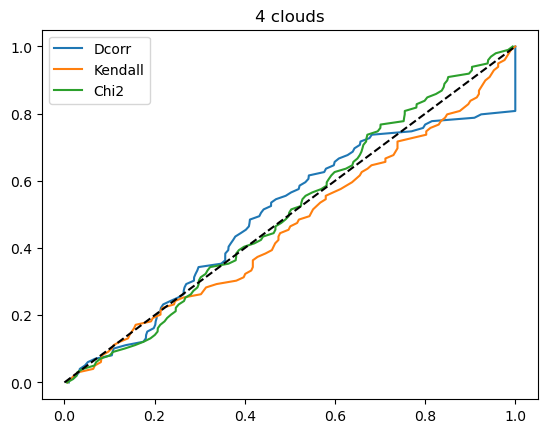

In [38]:
task(2,100,"4 clouds")

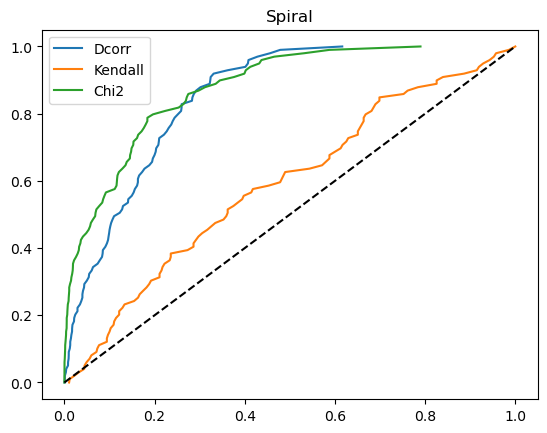

In [27]:
task(3,100,"Spiral")

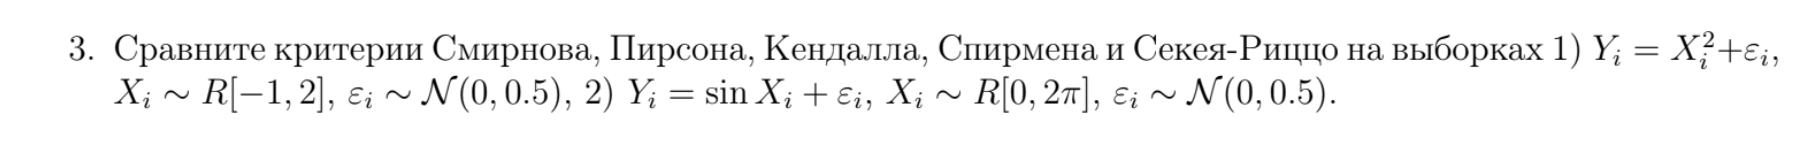

In [14]:
def emp_2d(x, y, data: np.array):
    n =  len(data[0])
    pairs = list(zip(data[0,:], data[1,:]))
    test_pair = (x, y)
    res = sum([np.less_equal(pair, test_pair).prod() for pair in pairs])/n
    return res
def emp_1d(x, data):
    n = len(data)
    res = sum(data <= x)/n
    return res
def smirnov_stat(data):
    x = data[0]
    y = data[1]
    n = len(x)
    test = np.sqrt(n) * max([np.abs(emp_2d(X,Y,data) - emp_1d(X, x)*emp_1d(Y, y)) for X, Y in zip(x, y)])
    return test
def monte_carlo_test(data, statistic):
    size = len(data)
    pvalue = (data>statistic).sum()/size
    return pvalue
def gen_samp_1(size):
    X = sts.uniform.rvs(loc = -1, scale = 3, size = size) 
    Y = X**2 + sts.norm.rvs(loc = 0, scale = 1/4, size = size)
    return X, Y
def gen_samp_2(size):
    X = sts.uniform.rvs(loc = 0, scale = 2*np.pi, size = size)
    Y = np.sin(X) + sts.norm.rvs(loc = 0, scale = 1/4, size = size)
    return X, Y

In [15]:
division_rate = 100 
def task4(mode, size, name):
    fig, ax = plt.subplots()
    plt.title(f"{name}")
    res_smr, res_prs, res_knd, res_spr, res_sr = [], [], [], [], []
    division_rate = 100
    
    size_ = (2, size)
    data_test = np.array([smirnov_stat(sts.uniform.rvs(size=size_)) for k in range(1000)])
    
    if mode==1:
        generate_func = gen_samp_1
    else:
        generate_func = gen_samp_2
    
    for j in range(division_rate):
        x, y = generate_func(size)
        res_sr.append(Dcorr().test(x, y).pvalue)
        res_knd.append(sts.kendalltau(x, y).pvalue)
        res_smr.append(monte_carlo_test(data_test, smirnov_stat(np.array([x,y]))))
        res_prs.append(sts.pearsonr(x, y)[1])
        res_spr.append(sts.spearmanr(x, y)[1])
    y = np.linspace(0,1,division_rate)
    ax.plot(np.sort(res_sr), y, label = "Dcorr")
    ax.plot(np.sort(res_knd), y, label = "Kendall")
    ax.plot(np.sort(res_smr), y, label = "Smirnov")
    ax.plot(np.sort(res_prs), y, label = "Pearson")
    ax.plot(np.sort(res_spr), y, label = "Spearman")

    ax.plot(y,y, linestyle='dashed', color = 'black')
    ax.legend()

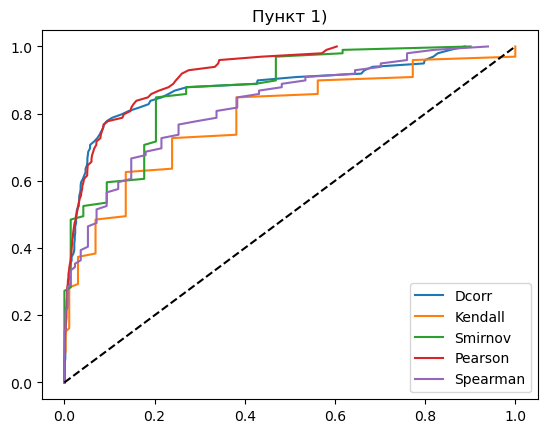

In [16]:
task4(1, 7, 'Пункт 1)')

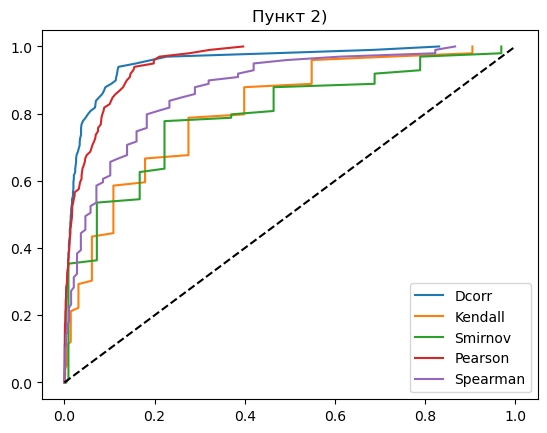

In [17]:
task4(2, 8, 'Пункт 2)')